***Girish Palya***|

>**Task 3**

>Can we impose the restrictions on advertisement in order to prevent unhealthy choices? Let us analyze this problem using the extreme example of opium pain killers. Can advertisement prohibition be justified? 
The introduction to this discussion can be found at: 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2622774/
https://www.theguardian.com/us-news/2017/oct/25/americas-opioid-crisis-how-prescription-drugs-sparked-a-national-trauma
https://www.smithsonianmag.com/science-nature/how-advertising-shaped-first-opioid-epidemic-180968444/   
At the same time, we can analyze the example of Poland, where consuming this type of drugs is strongly restricted, and people suffering from pain (for instance, because of cancer) suffer a lot.

>Model:
a) For the sake of simplicity, let us assume that the drugs market is a monopoly.  The cost of producing the drug is low, and let us assume that TC (total cost) = 5q. The function of demand for the drug is $q_{d}$ = 10000 - 25$p_{d}$   Define the equilibrium conditions of this problem (hint: assume that the firm is rational and profit-maximizing). (2p)


Ordinary monopolist maximizes profit.



In [2]:
%matplotlib inline
import sympy as sym
from sympy.plotting import plot

q = sym.Symbol('q')
profit = ((400 - (q/25)) * q) - (5*q)
eq = sym.diff(profit, q)
quantity_m = sym.solveset(eq, q).evalf()
print('Under monopolist, quantity of drugs sold: ', quantity_m.args[0])

Under monopolist, quantity of drugs sold:  4937.50000000000


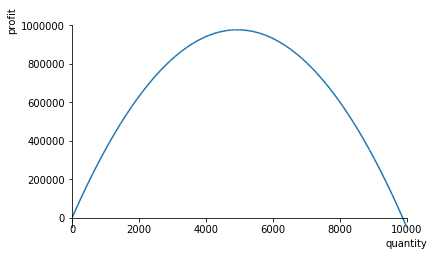

In [3]:
# plotting profit vs quantity

plot(profit, (q, 0, 10000), xlabel='quantity', ylabel='profit')

>b) Let us assumed that consumption of pain killers is useful for society up to some point and produces positive consumption externalities, as people not suffering from severe pain are more productive. After achieving a saturation point, the consumption starts to produce negative externalities. For the sake of simplicity, we can present external effects as inverse parabola depicted by function $EX_{d}$=2$q_{d}$ - .01$q_{d}^{2}$. The government wants to reduce the consumption of pain killers to the point maximizing positive externalities. The limit of consumption is imposed through introducing strict conditions of supplying the drug (the consumers need a doctor’s prescription). 


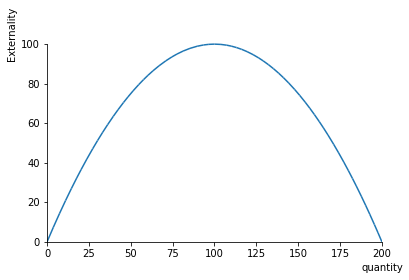

In [4]:
# plot
EX = (2*q) - (0.01*(q**2))
plot(EX, (q, 0, 200), xlabel='quantity', ylabel='Externality')

>b1) Define the level of consumption, for which $EX(q_{d})'=0$ . For this level of production, calculate the profits of monopoly and consumer surplus. (4p)



In [5]:
consumption = sym.solve(sym.diff(EX, q), q)[0]
print(f'level of consumption = {consumption}')
print('profit for the monopolist =', profit.subs(q, consumption))

level of consumption = 100.000000000000
profit for the monopolist = 39100.0000000000


In [6]:
# net consumer surplus
price = (400 - (q/25))
p = price.subs(q, consumption)
print(f'net consumer surplus: {(0.5 * (400-p) * consumption).evalf(3)}')

net consumer surplus: 200


>b2) This level of production is not optimal for a monopoly. Due to monopolist’s lobby, the limits on drug consumption are removed (now it can be sold without doctor’s prescription). Define how eliminating the limits on consumption would affected Social Welfare (Total Surplus) = CS (Consumer Surplus) + PS (profits of monopoly) + EX (externalities). (3p)


In [7]:
# quantity sold = 4937.5
def social_welfare(quant_v):
    p = price.subs(q, quant_v)
    CS = 0.5 * quant_v * (400 - p)
    PS = profit.subs(q, quant_v)
    Ex = EX.subs(q, quant_v)
    #print(p, CS, PS, Ex)
    return (CS + PS + Ex)

print('Social Welfare (no limits): ', social_welfare(quantity_m.args[0]))
print('Social Welfare (with governemnt limits): ', social_welfare(100))

Social Welfare (no limits):  1228820.31250000
Social Welfare (with governemnt limits):  39400.0000000000


>b3) Instead of quota on pain killers, the government decided to introduce ad valorem tax t. The monopoly would treat this tax as increase in costs MC (marginal cost) = ATC (average total cost) = 5 + t. The government would attempt one to maximize tax burden /tax revenue T(t). Define tax revenue as a function of tax rate and define the maximum of this function. Tell how introducing this regulation affects Social Welfare (Total Surplus) = CS (Consumer Surplus) + PS (profits of monopoly) + EX (externalities). Define tax rate t, for which social surplus is maximized. (4p)



In [13]:
t = sym.Symbol('t')
# Marginal Revenue == Marginal Cost
Revenue = (400 - (q / 25)) * q
MR = sym.diff(Revenue, q)
sym.solve((MR - 5 - t), q)[0]

9875/2 - 25*t/2

A different way of deriving quantity (consumption):

In [15]:
profit_t = ((400-(q/25))*q)-((5+t)*q)
eq = sym.diff(profit_t, q)
quantity_e = sym.solveset(eq, q)
print('Quantity of drugs sold: ', quantity_e)

Quantity of drugs sold:  {9875/2 - 25*t/2}


In [16]:
# Tax revenue
TR = quantity_e.args[0] * t
eq = sym.diff(TR, t)
tax = sym.solveset(eq, t).evalf()
print('tax (units): ', tax.args[0])
print('Government\'s max tax revenue: ', TR.evalf(subs={t: tax.args[0]}))

tax (units):  197.500000000000
Government's max tax revenue:  487578.125000000


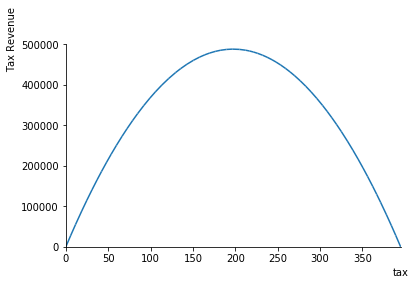

In [17]:
plot(TR, (t, 0, 395), xlabel='tax', ylabel='Tax Revenue')

In [18]:
quantity = quantity_e.args[0].evalf(subs={t: tax.args[0]})
print('Quantity of drugs sold:', quantity)
p = price.evalf(subs={q: quantity})
CS = 0.5 * quantity * (400 - p)
PS = profit_t.evalf(subs={q: quantity,t: tax.args[0]})
Ex = EX.evalf(subs={q: quantity})
#print(p, CS, PS, Ex)
print('Social Welfare (with governemnt tax): ', social_welfare(quantity))

Quantity of drugs sold: 2468.75000000000
Social Welfare (with governemnt tax):  797251.953125000


Introducing tax reduces social welfare (as a result of reduced output). But the welfare is higher than restricting supply through prescription. Highest social benefit is when government is not involved, and when monopolist maximizes profits.

>b4) Compare the solutions and analyze the results. Determine if such a simplified model can be useful for analysing such problems. Skip the discussions of whether parameters are realistic, and focus on the ration of the behaviour of this model. Is it possible to use a market solution in this case? Is perfect competition (p = MC) on the market with no regulations or taxes an optimal solution from the standpoint of the society? Is perfect competition better or worse than  monopoly from tis perspective?  (6p)


Addiction to pain killer drugs has a social cost. I am not sure if the negative externality is accurately captured in the EX (externality) equation. These numbers suggest that letting monopolist determine the supply (based on profit) leads to the highest Social Welfare! It may be true, since monopolist will have to reinvest his profits. A private enterprise often makes better choices of investing money than government (where incentives are aligned to satisfy narrow political constituencies). Also, since black market for drugs (for instance, illegal Fentanyl smuggling from China) exist, then government restriction is not going to be effective. There enforcement cost (on US government) will be prohibitive (Chinese government has done little to crack down on their Fentanyl manufacturers).

>c) The monopoly has used all its lobby for eliminating regulations on the market and all competition. Therefore, the monopoly cannot prevent government from imposing drug advertisement prohibition. In this situation, the monopoy would attempt to maximize revenues. Let us assume that marketing expenses A result in higher number of consumers in the following way:  $q_{d}$ = M(1000-5$p_{d}$) and M=1 + A/100.


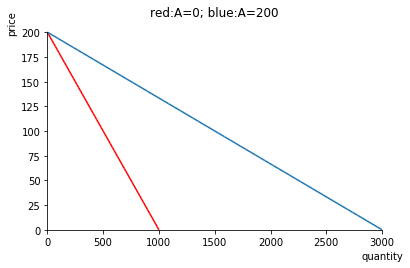

In [19]:
M, A, p = sym.symbols('M A p')
Eq1 = M * (1000 - (5 * p)) - q
Eq2 = 1 + (A / 100) - M

# demand curve for A=0 and A=200
Price = sym.solve(Eq1.subs(M, 1 + (A/100)), p)[0]
p = plot(Price.subs(A, 0), (q, 0, 1000), xlabel='quantity', ylabel='price', show=False, line_color='red', title='red:A=0; blue:A=200')
p.extend(plot(Price.subs(A, 200), (q, 0, 3000), xlabel='quantity', ylabel='price', show=False))
p.show()

In [20]:
Profit = (Price * q) - (5 * q)
Eq3 = sym.diff(Profit, q)
Quantity_e = sym.solveset(Eq3, q).args[0]
print('Quantity of drugs sold:', Quantity_e)

Quantity of drugs sold: 39*(A + 100)/8


>c1) Define the optimum ad spending, which would maximize the profits of monopoly. The firm is not going to spend more than Amax = 200 on marketing. (4p) [Hint: analyse the profit function correctly]  


In [21]:

print('Profit: ', Profit.subs(q, Quantity_e))
      

Profit:  975*A - 7995*(A + 100)/16 + 97500


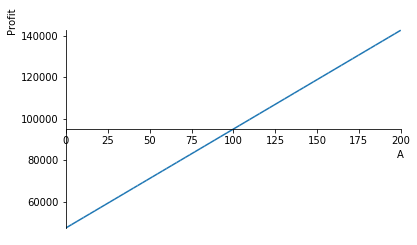

In [22]:
plot(Profit.subs(q, Quantity_e), (A, 0, 200), xlabel='A', ylabel='Profit')

In [23]:
print('Optimum ad spending is A = 200')
profit_a = Profit.subs(q, Quantity_e).subs(A, 200).evalf()
quantity_a = Quantity_e.subs(A, 200).evalf()
price_a = Price.subs(q, Quantity_e).subs(A, 200).evalf()
print('Max profit:', profit_a)
print('Quantity of drugs sold:', quantity_a)
print('Price:', price_a)

Optimum ad spending is A = 200
Max profit: 142593.750000000
Quantity of drugs sold: 1462.50000000000
Price: 102.500000000000


>c2) Calculate market condition and Social Welfare after the ad campaign. (3p)


In [24]:
CS = 0.5 * quantity_a * (200 - price_a)
Ex = EX.subs(q, quantity_a)
print('Social Welfare:', profit_a + CS + Ex)

Social Welfare: 195426.562500000


>c3) Interpret the results from c1-c2. Refer to situations presented in the articles. 



TBD

>d) In my opinion, eliminating any type of regulations on drugs market was motivated by domination of neoliberal spirit. Something perceived as purely theoretical solution was implemented as a valid policy. This is the canonic article from that times: 
https://pdfs.semanticscholar.org/ebf3/f79cd5e3795db374d715206b83deee4057db.pdf, 
The article is a fundament of Theory of Rational Addiction. Below, you can find an extraction from article criticizing this theory.   
 “Becker and Murphy (1988) state that ‘‘addictions, even strong ones, are usually rational in the sense of involving forward-looking maximization with stable preferences’’ (675) and that their model implies that addicts ‘‘would be even more unhappy if they were prevented from consuming the addictive goods’’ (691). Orphanides and Zervos (1995) use their model as the basis for a welfare analysis of information, education and public policy (751–754). See also the views on welfare analysis in Becker 1996, 20.” 
https://pdfs.semanticscholar.org/8a42/0ea49956c58b1b40c142c931a2d43a1aa3f6.pdf
Refer these articles to your task analysis. (8p)


Neoliberalism advocates for laissez-fair approach to regulation since anything contrary would be viewed as restrictions on liberty of individual. Becker, being a neolibaral thoerist, does not advocate for strict disciplinary power of governemnt over addictive substances. However, he supports 'sin taxes' through his Rational Addiction Theory. He claims to not infringe on individual liberty, since taxation and regulations only affect the individual's choices indirectly.

The key apsect of Rational Addiction Theory is that permanent increase in prices of addictive goods will lead to reduced consumption, and eventually to abstinance through 'cold turkey'. Both reduction in current consumption by an addict, and eventual abstinence through 'cold turkey' can be attributed to rational choices the addict makes by considering permanenet increase in future prices (say, through taxation). 

There are two key assumptions: First, current consumption of addictive goods is a complement to future consumption. Consumption is an investment choice, and current consumption represents a stock. For example, by smoking today you increase your smoking stock. Prices have effect on future levels of various stocks of addictive substances. The more you smoke today, the worse off you will be tomorrow in terms of stock available in the future. Individuals exploit these effects and design a detailed consumption plan for their future. Second, the more (addictive substance) you consume today, the more rewarding the addictive consumption will become (the higher the stock, the higher the marginal utility of the addictive commodity). Otherwise the substance will not become addictive (rational explanation, not a psychological explanation).

In our model, both regulation (restrictions on access) and taxation reduces quantity (supply), reduces profit (to monopoly), and thereby reduces Social Welfare. Although Becker's theory does not address social welfare, there is an implicit assumption that curbing addiction through government intervention is a good thing. In our model, the externality function is ill defined (from Becker's perspective). It should provide much higher negative number so that the positive effect of profit (of monopoly) gets canceled out at higher quantity (consumption levels). Another way to interpret it is that, a pure free market solution (without government intervention) does not lead to optimum outcome if we accept Becker's theory.

My objection to taxation on addictive goods is that it leads to black market. Also, more money in government coffers leads to corruption. When government raises taxes on goods that are in high demand, it creates market for alternate ways of distribution (black market). These factors are outside the scope of Becker's theory.